In [53]:
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [54]:
from PIL import Image
path = '../images/64/'
# im = Image.open(path + 'waldo/1_1_1.jpg')
# im.to_thumb(128,128)

In [55]:
from fastai.vision.all import *
filenames = get_image_files(path)
filenames

(#5429) [Path('../images/64/notwaldo/10_0_0.jpg'),Path('../images/64/notwaldo/10_0_1.jpg'),Path('../images/64/notwaldo/10_0_10.jpg'),Path('../images/64/notwaldo/10_0_11.jpg'),Path('../images/64/notwaldo/10_0_12.jpg'),Path('../images/64/notwaldo/10_0_13.jpg'),Path('../images/64/notwaldo/10_0_14.jpg'),Path('../images/64/notwaldo/10_0_15.jpg'),Path('../images/64/notwaldo/10_0_2.jpg'),Path('../images/64/notwaldo/10_0_3.jpg')...]

In [56]:
failed = verify_images(filenames)
failed

(#0) []

In [57]:
img = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(64)])

In [58]:
dls = img.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


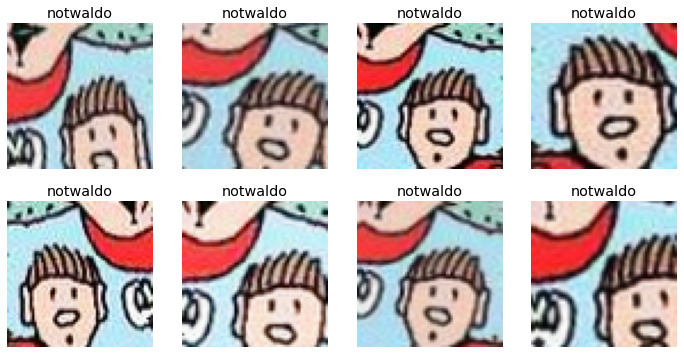

In [59]:
img = img.new(item_tfms=RandomResizedCrop(64, min_scale=0.5), batch_tfms=[Rotate(), Flip(), Brightness(), Contrast()])
dls = img.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [60]:

metrics = [accuracy, error_rate]
our_out_of_the_box_model = cnn_learner(dls, resnet152, loss_func=CrossEntropyLossFlat(), metrics=metrics)
our_out_of_the_box_model.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.934286,0.419676,0.821198,0.178802,05:14


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.367249,0.163366,0.988018,0.011982,07:11
1,0.193016,1.576120,0.954839,0.045161,06:32
2,0.102156,0.027991,0.996313,0.003687,06:31
3,0.065232,0.023650,0.995392,0.004608,06:45
4,0.052645,0.019083,0.997235,0.002765,06:17


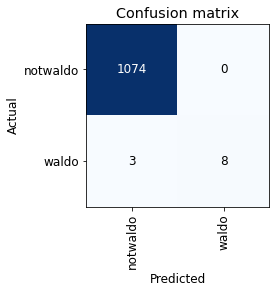

In [61]:
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()

In [62]:
our_out_of_the_box_model.save('model')
our_out_of_the_box_model.export()